In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
from keras.datasets import mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()
x_test.shape
x_train.shape

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


(60000, 28, 28)

In [ ]:
import matplotlib.pyplot as plt
x_train = x_train.reshape(60000,28*28)
x_train = x_train.astype('float32')/255
x_test = x_test.reshape(10000,28*28)
x_test = x_test.astype('float32')/255

from keras.utils import to_categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential()
model.add(Dense(512, activation='relu',input_shape=(28*28,)))
model.add(Dense(112,activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

history = model.fit(x_train, y_train, epochs=20, batch_size=50, validation_data=(x_test, y_test))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 512)                 │         401,920 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 112)                 │          57,456 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │           1,130 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 460,506 (1.76 MB)

 Trainable params: 460,506 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 17s 12ms/step - accuracy: 0.8972 - loss: 0.3529 - val_accuracy: 0.9632 - val_loss: 0.1092
Epoch 2/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9759 - loss: 0.0775 - val_accuracy: 0.9769 - val_loss: 0.0728
Epoch 3/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 15s 10ms/step - accuracy: 0.9844 - loss: 0.0485 - val_accuracy: 0.9753 - val_loss: 0.0786
Epoch 4/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 11s 9ms/step - accuracy: 0.9891 - loss: 0.0364 - val_accuracy: 0.9798 - val_loss: 0.0674
Epoch 5/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9920 - loss: 0.0256 - val_accuracy: 0.9812 - val_loss: 0.0707
Epoch 6/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 21s 10ms/step - accuracy: 0.9913 - loss: 0.0241 - val_accuracy: 0.9819 - val_loss: 0.0674
Epoch 7/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9942 - loss: 0.0171 - val_accuracy: 0.9789 - val_loss: 0.0855
Epoch 8/20
1200/1200 ━━━━━━━━━━━━━━━━━━━━ 20s 9ms/step - accuracy: 0.9944 - los

In [ ]:
from keras.models import load_model
model.save('/content/drive/MyDrive/mnist_model.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step


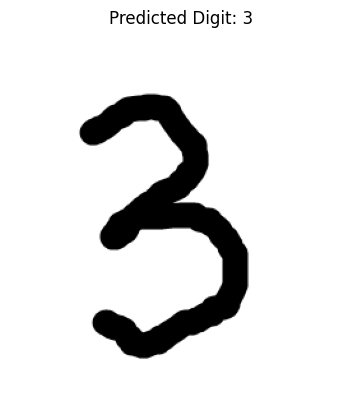

Predicted Digit: 3


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import load_model

model = load_model('/content/drive/MyDrive/mnist_model.h5')

def preprocess_image(image_path):
  img=cv2.imread(image_path,cv2.IMREAD_GRAYSCALE)
  img = cv2.resize(img,(28,28))
  img= cv2.bitwise_not(img)
  img =img.astype('float32')/255.0
  img = img.reshape(1, 28*28)
  return img

def predict_digit(image_path):
  processed_img = preprocess_image(image_path)
  prediction = model.predict(processed_img)
  predicted_digit = np.argmax(prediction)
  img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
  plt.imshow(img, cmap='gray')
  plt.title(f'Predicted Digit: {predicted_digit}')
  plt.axis('off')
  plt.show()
  return predicted_digit

image_path = '/content/3.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


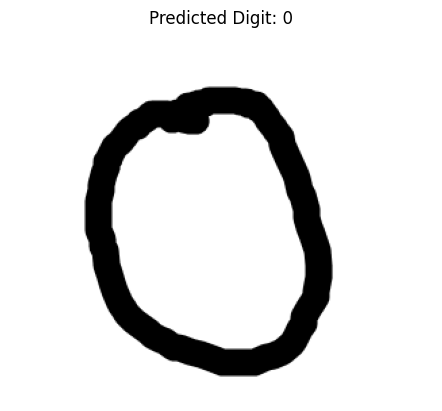

Predicted Digit: 0


In [ ]:
image_path = '/content/0.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step


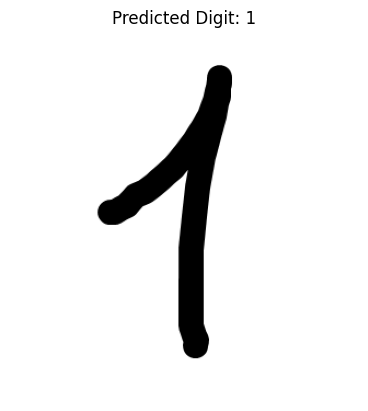

Predicted Digit: 1


In [ ]:
image_path = '/content/1.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step


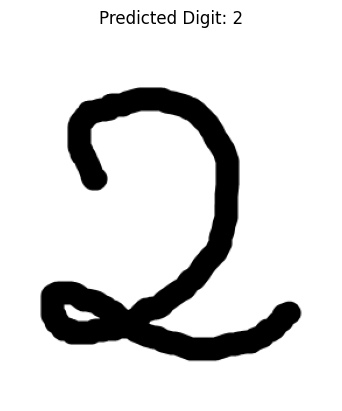

Predicted Digit: 2


In [ ]:
image_path = '/content/2.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


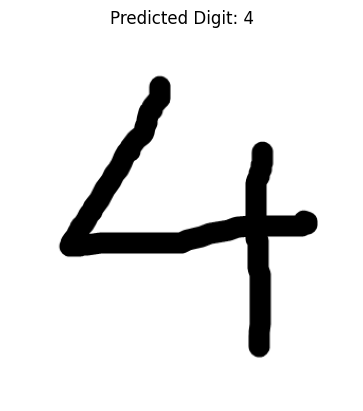

Predicted Digit: 4


In [ ]:
image_path = '/content/4.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


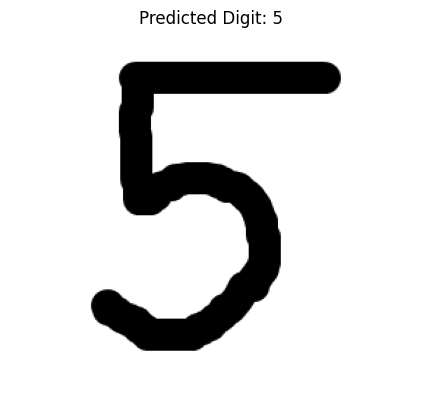

Predicted Digit: 5


In [ ]:
image_path = '/content/5.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step


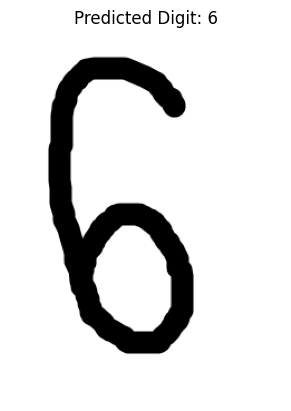

Predicted Digit: 6


In [ ]:
image_path = '/content/6.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


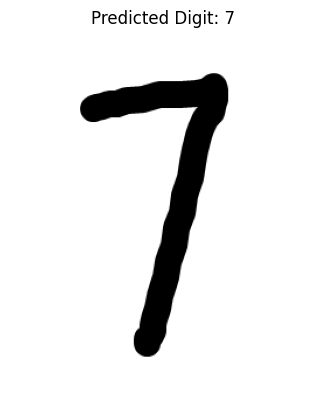

Predicted Digit: 7


In [ ]:
image_path = '/content/7.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


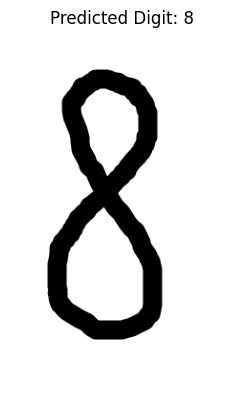

Predicted Digit: 8


In [ ]:
image_path = '/content/8.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


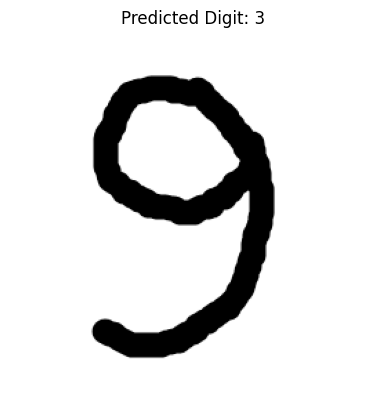

Predicted Digit: 3


In [ ]:
image_path = '/content/9.png'
predicted_digit = predict_digit(image_path)
print(f'Predicted Digit: {predicted_digit}')